In [ ]:
import pandas as pd
def get_data():
    return pd.read_csv('metadata.csv')
meta = get_data()
meta.head()

,videoname,original_width,original_height,label,original
0,aznyksihgl.mp4,129,129,FAKE,xnojggkrxt.mp4
1,gkwmalrvcj.mp4,129,129,FAKE,hqqmtxvbjj.mp4
2,lxnqzocgaq.mp4,223,217,FAKE,xjzkfqddyk.mp4
3,itsbtrrelv.mp4,186,186,FAKE,kqvepwqxfe.mp4
4,ddvgrczjno.mp4,155,155,FAKE,pluadmqqta.mp4


In [ ]:
from IPython.display import display
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['count'] = df.count().values
    summary_df['unique'] = df.nunique().values
    summary_df['missing#'] = df.isna().sum()
    summary_df['missing%'] = df.isna().sum() / len(df)
    return summary_df
styled = summary(meta).style.background_gradient('Purples')
display(styled)

,dtypes,count,unique,missing#,missing%
videoname,object,95634,95634,0,0.000000
original_width,int64,95634,31,0,0.000000
original_height,int64,95634,34,0,0.000000
label,object,95634,2,0,0.000000
original,object,79341,16955,16293,0.170368


In [ ]:
num_fake = len(meta[meta.label == 'FAKE'])
num_real = len(meta[meta.label == 'REAL'])
print(f'🟥 Fake Images: {num_fake}')
print(f'🟩 Real Images: {num_real}')

🟥 Fake Images: 79341
🟩 Real Images: 16293


In [ ]:
real_df = meta[meta['label'] == 'REAL']
fake_df = meta[meta['label'] == 'FAKE']
sample_size = min(len(real_df), len(fake_df), 16000)
real_df = real_df.sample(sample_size, random_state=42)
fake_df = fake_df.sample(sample_size, random_state=42)
sample_meta = pd.concat([real_df, fake_df]).reset_index(drop=True)
print(sample_meta['label'].value_counts())

label
REAL    16000
FAKE    16000
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
Train_set, Test_set = train_test_split(
    sample_meta,
    test_size=0.2,
    random_state=42,
    stratify=sample_meta['label']
)
Train_set, Val_set = train_test_split(
    Train_set,
    test_size=0.3,
    random_state=42,
    stratify=Train_set['label']
)
print(f'Train Set:      {Train_set.shape}')
print(f'Validation Set: {Val_set.shape}')
print(f'Test Set:       {Test_set.shape}')


Train Set:      (17920, 5)
Validation Set: (7680, 5)
Test Set:       (6400, 5)


In [ ]:
import plotly.graph_objects as go
import numpy as np
def plot_class_counts(train_set, val_set, test_set):
    sets = ['Train Set', 'Validation Set', 'Test Set']
    colors = ['#52A666', '#C15B4E']

    y = {
        'REAL': [np.sum(train_set == 'REAL'), np.sum(val_set == 'REAL'), np.sum(test_set == 'REAL')],
        'FAKE': [np.sum(train_set == 'FAKE'), np.sum(val_set == 'FAKE'), np.sum(test_set == 'FAKE')]
    }

    trace0 = go.Bar(x=sets, y=y['REAL'], name='REAL', marker_color=colors[0], opacity=0.7)
    trace1 = go.Bar(x=sets, y=y['FAKE'], name='FAKE', marker_color=colors[1], opacity=0.7)

    fig = go.Figure(data=[trace0, trace1])
    fig.update_layout(
        title='Count of Classes in Each Set',
        xaxis_title='Dataset',
        yaxis_title='Count',
        barmode='group'
    )
    fig.show()
plot_class_counts(Train_set['label'].values, Val_set['label'].values, Test_set['label'].values)

In [ ]:
import zipfile
import os

zip_file_path = '/content/faces_224.zip'
extract_folder = '/content'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

extracted_files = os.listdir(os.path.join(extract_folder, 'faces_224'))
print(extracted_files[:10])


['xrluwubrhs.jpg', 'qwqwuoijeh.jpg', 'itgrgobbrq.jpg', 'rkdwwwwasl.jpg', 'rkukylmybd.jpg', 'rpojqovyxd.jpg', 'glxfafqbcf.jpg', 'bktrcdwbjx.jpg', 'embcmvxhau.jpg', 'ijekimunpj.jpg']


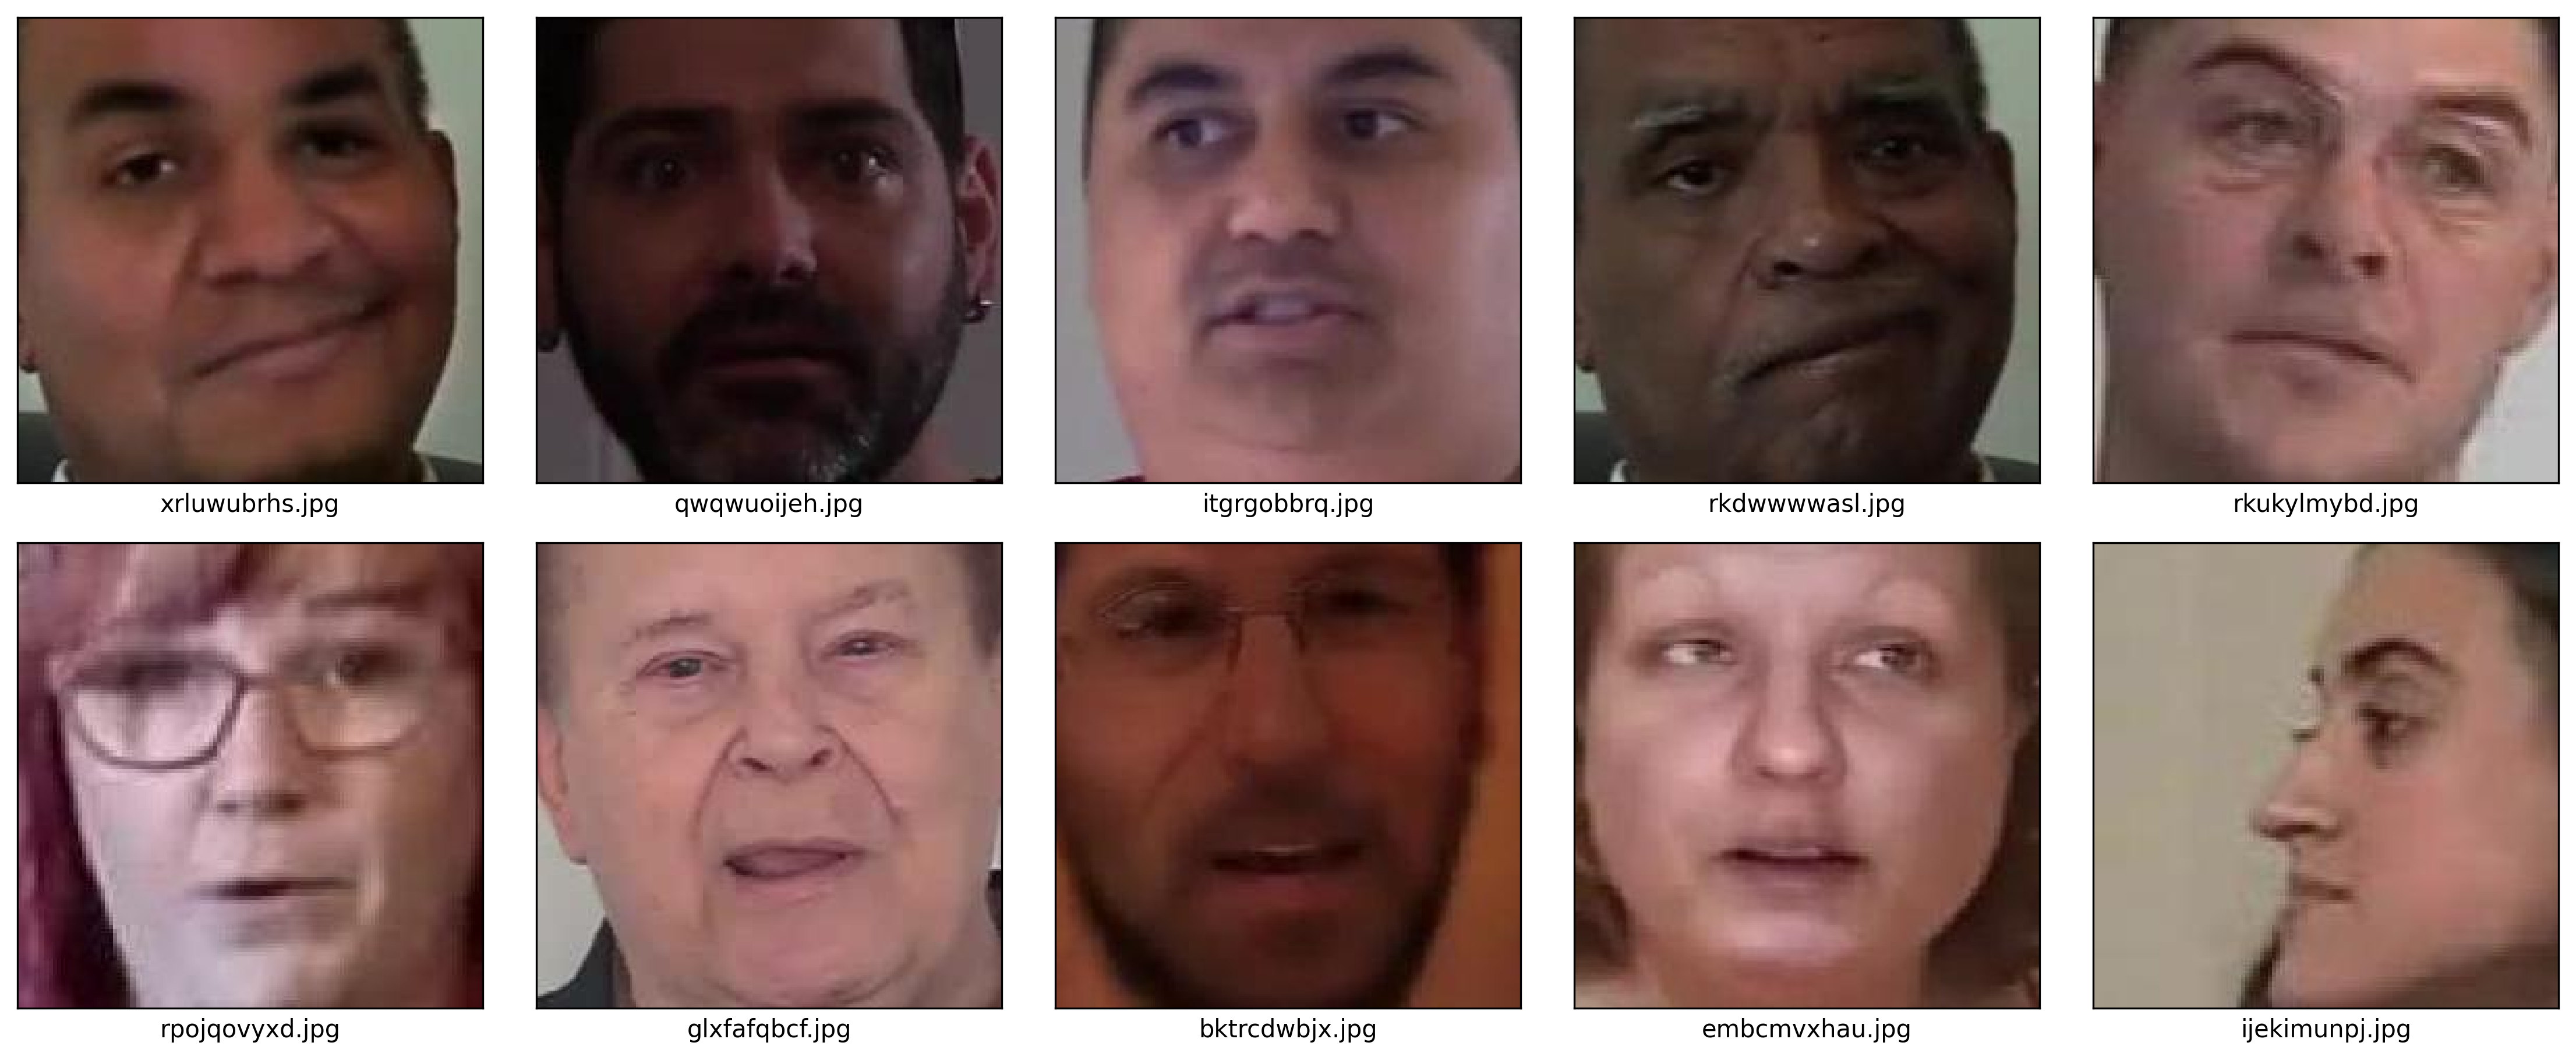

In [ ]:
import cv2
import matplotlib.pyplot as plt
base_image_path = '/content/faces_224'
plt.figure(figsize=(15, 15), dpi=300)
for idx, image_filename in enumerate(extracted_files[:10]):
    plt.subplot(5, 5, idx + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_path = os.path.join(base_image_path, image_filename)
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.xlabel(image_filename)
    else:
        plt.text(0.5, 0.5, 'Image Not Found', ha='center', va='center', fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
def retrieve_dataset(set_name):
    images, labels = [], []
    for (img, imgclass) in zip(set_name['videoname'], set_name['label']):
        images.append(cv2.imread('/content/faces_224/' + img[:-4] + '.jpg'))
        labels.append(1 if imgclass == 'FAKE' else 0)
    return np.array(images), np.array(labels)
X_train, y_train = retrieve_dataset(Train_set)
X_val, y_val = retrieve_dataset(Val_set)
X_test, y_test = retrieve_dataset(Test_set)

In [ ]:
!pip uninstall tensorflow -y
!pip install tensorflow==2.18.0


Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
  Using cached tensorflow-2.18.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
Using cached tensorflow-2.18.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (615.4 MB)


In [ ]:
!pip install --upgrade tensorflow-text tensorflow-decision-forests tf-keras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 72.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
  Attempting uninstall:

Epoch 1/2
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 4629s 4s/step - accuracy: 0.5855 - loss: 0.6777 - val_accuracy: 0.6539 - val_loss: 0.6136
Epoch 2/2
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 4570s 4s/step - accuracy: 0.6509 - loss: 0.6210 - val_accuracy: 0.6702 - val_loss: 0.5928


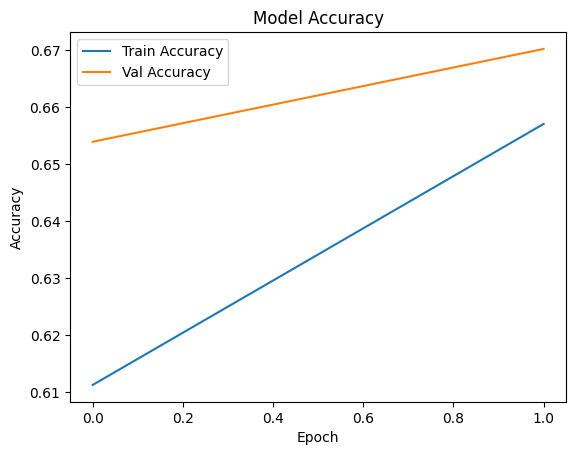

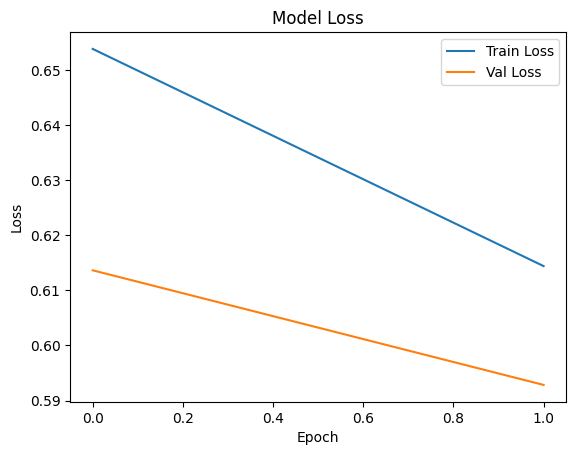

In [ ]:
import zipfile
import os
import numpy as np
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB4
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Extract ZIP
zip_file_path = '/content/faces_224.zip'
extract_folder = '/content/faces_224'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Step 2: Load metadata
meta = pd.read_csv('metadata.csv')

# Step 3: Prepare data
real_df = meta[meta['label'] == 'REAL'].sample(16000, random_state=42)
fake_df = meta[meta['label'] == 'FAKE'].sample(16000, random_state=42)
sample_meta = pd.concat([real_df, fake_df])
Train_set, Test_set = train_test_split(sample_meta, test_size=0.2, random_state=42, stratify=sample_meta['label'])
Train_set, Val_set = train_test_split(Train_set, test_size=0.3, random_state=42, stratify=Train_set['label'])

# Step 4: Image generator
def image_generator(set_name, batch_size=16):
    while True:
        batch_images, batch_labels = [], []
        for (img, imgclass) in zip(set_name['videoname'], set_name['label']):
            img_path = os.path.join(extract_folder, img[:-4] + '.jpg')
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (224, 224))
                batch_images.append(img)
                batch_labels.append(1 if imgclass == 'FAKE' else 0)

            if len(batch_images) >= batch_size:
                yield np.array(batch_images), np.array(batch_labels)
                batch_images, batch_labels = [], []

train_gen = image_generator(Train_set, batch_size=16)
valid_gen = image_generator(Val_set, batch_size=16)
test_gen = image_generator(Test_set, batch_size=16)

# Step 5: Build model
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train
history = model.fit(
    train_gen,
    steps_per_epoch=len(Train_set)//16,
    epochs=2,
    validation_data=valid_gen,
    validation_steps=len(Val_set)//16
)

# Step 7: Save model
model.save('face_fake_real_classifier.keras')  # recommended format

# Step 8: Plot results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
!ls /content


face_fake_real_classifier.keras  faces_224.zip	sample_data
faces_224			 metadata.csv


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Load saved model
model = tf.keras.models.load_model('face_fake_real_classifier.keras')

# Reload metadata and test set
meta = pd.read_csv('metadata.csv')
real_df = meta[meta['label'] == 'REAL'].sample(16000, random_state=42)
fake_df = meta[meta['label'] == 'FAKE'].sample(16000, random_state=42)
sample_meta = pd.concat([real_df, fake_df])
_, Test_set = train_test_split(sample_meta, test_size=0.2, random_state=42, stratify=sample_meta['label'])

extract_folder = '/content/faces_224'

# Test image generator
def image_generator(set_name, batch_size=16):
    while True:
        batch_images, batch_labels = [], []
        for (img, imgclass) in zip(set_name['videoname'], set_name['label']):
            img_path = os.path.join(extract_folder, img[:-4] + '.jpg')
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (224, 224))
                batch_images.append(img)
                batch_labels.append(1 if imgclass == 'FAKE' else 0)

            if len(batch_images) >= batch_size:
                yield np.array(batch_images), np.array(batch_labels)
                batch_images, batch_labels = [], []

# Evaluate on test set
test_gen = image_generator(Test_set, batch_size=16)
test_loss, test_accuracy = model.evaluate(test_gen, steps=len(Test_set)//16)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on a new image
img_path = '/content/aaagqkcdis.jpg'  # UPDATE with actual path
if os.path.exists(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.efficientnet.preprocess_input(img)
    prediction = model.predict(img)
    print("Prediction (REAL=0, FAKE=1):", prediction)
else:
    print(f"Image not found at: {img_path}")


400/400 ━━━━━━━━━━━━━━━━━━━━ 1222s 3s/step - accuracy: 0.6831 - loss: 0.5821
Test Accuracy: 0.6772
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Prediction (REAL=0, FAKE=1): [[0.9266013]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3

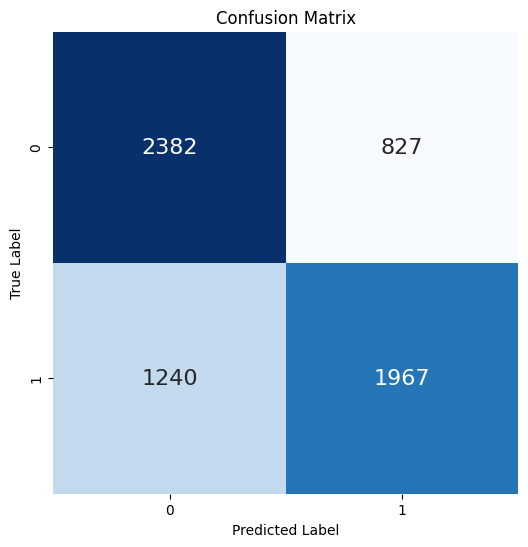

Classification Report:
              precision    recall  f1-score   support

        REAL       0.66      0.74      0.70      3209
        FAKE       0.70      0.61      0.66      3207

    accuracy                           0.68      6416
   macro avg       0.68      0.68      0.68      6416
weighted avg       0.68      0.68      0.68      6416



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Re-create test generator
test_gen = image_generator(Test_set, batch_size=16)

# Initialize prediction and true label lists
y_pred = []
y_true = []

# Loop over the test generator
for i, (images, labels) in enumerate(test_gen):
    preds = (model.predict(images) > 0.5).astype("int32").flatten()
    y_pred.extend(preds)
    y_true.extend(labels)

    # Stop after covering the test set once
    if i >= len(Test_set) // 16:
        break

# Compute confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['REAL', 'FAKE']))
